In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
algs = ["primal_lp", "dual_lp", "exp_lp", "dinic"]
capacities = ["50000-100000", "1-100", "1-1"]
capacities_colors = ["red", "green", "blue"]

# Experimenty
Ve všech grafech znázorňuje červená barva velké kapacity ($c\in\{50000,\ldots,100000\}$), zelená malé kapacity ($c\in\{1,\ldots,100\}$) a modrá jednotkové kapacity ($c=1$), $n,m$ je pořadě počet vrcholů a hran grafu. Všechny kapacity jsou uniformně náhodné.

## Řídké náhodné grafy
Pro každé $d\in\{1,\ldots,15\}$ pouštěno postupně na grafy s $n$ vrcholy a $dn$ hranami pro $n\in[50,3000]\cap 5\mathbb{Z}$.

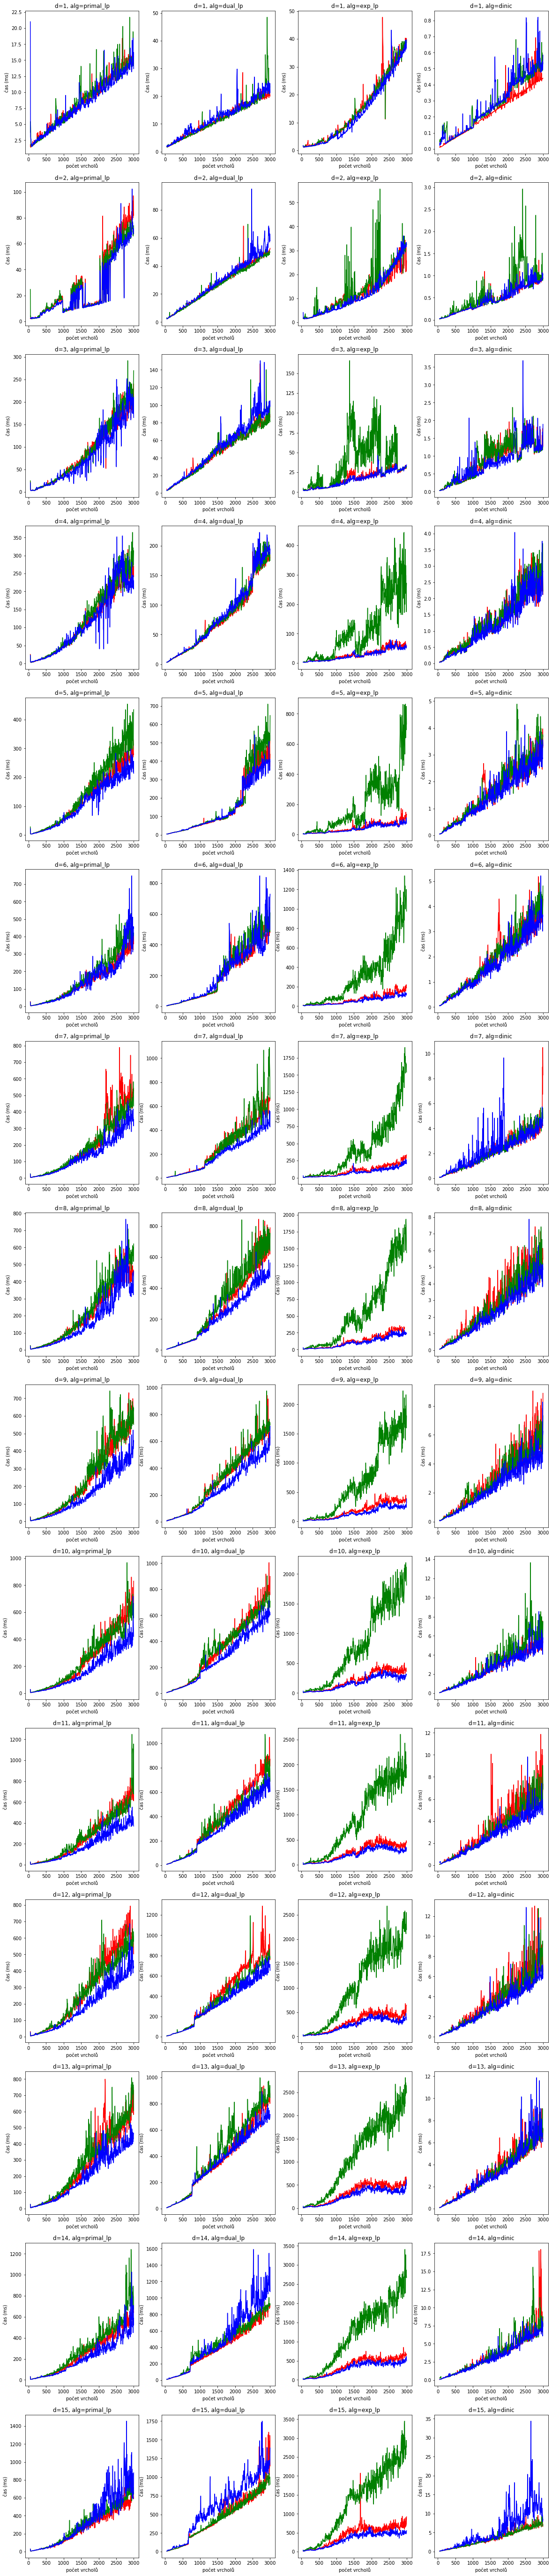

In [2]:
densities = range(1,16)
fig,axes = plt.subplots(nrows=len(densities),ncols=4,figsize=(20,100))

for cap,color in zip(capacities,capacities_colors):
    for i,d in enumerate(densities):
        dfs = [ pd.read_csv("../out/sparse{d}-{alg}-{cap}.csv".format(d=d,cap=cap,alg=alg)) for alg in algs ]
        for j,ax in enumerate(axes[i]):
            ax.set_xlabel("počet vrcholů")
            ax.set_ylabel("čas (ms)")
            ax.set_title("d={d}, alg={alg}".format(d=d,alg=algs[j]))
            ax.plot(dfs[j]['n'], dfs[j][algs[j]]/1000000,color=color)        
plt.show()
   

Je na první pohled vidět a dalo se to taky čekat, že se řešiče LP nemůžou časově srovnávat s Dinicovým algoritmem, který je přímo na tento problém postavený. 
Je ale zajímavé porovnání časů formulace primárního a duálního programu. Pro některé sady instancí (d=3,4) je duální formulace výrazně lepší, pro jiné (d=7,9,12) je zase primární formulace lepší, pro ostatní je to cca stejné. Dále lze také konstantovat, že velikosti kapacit na dobu běhu algoritmu v průměru moc vliv nemají. Pro všechny 3 možnosti jsou běhy srovnatelně rychlé.

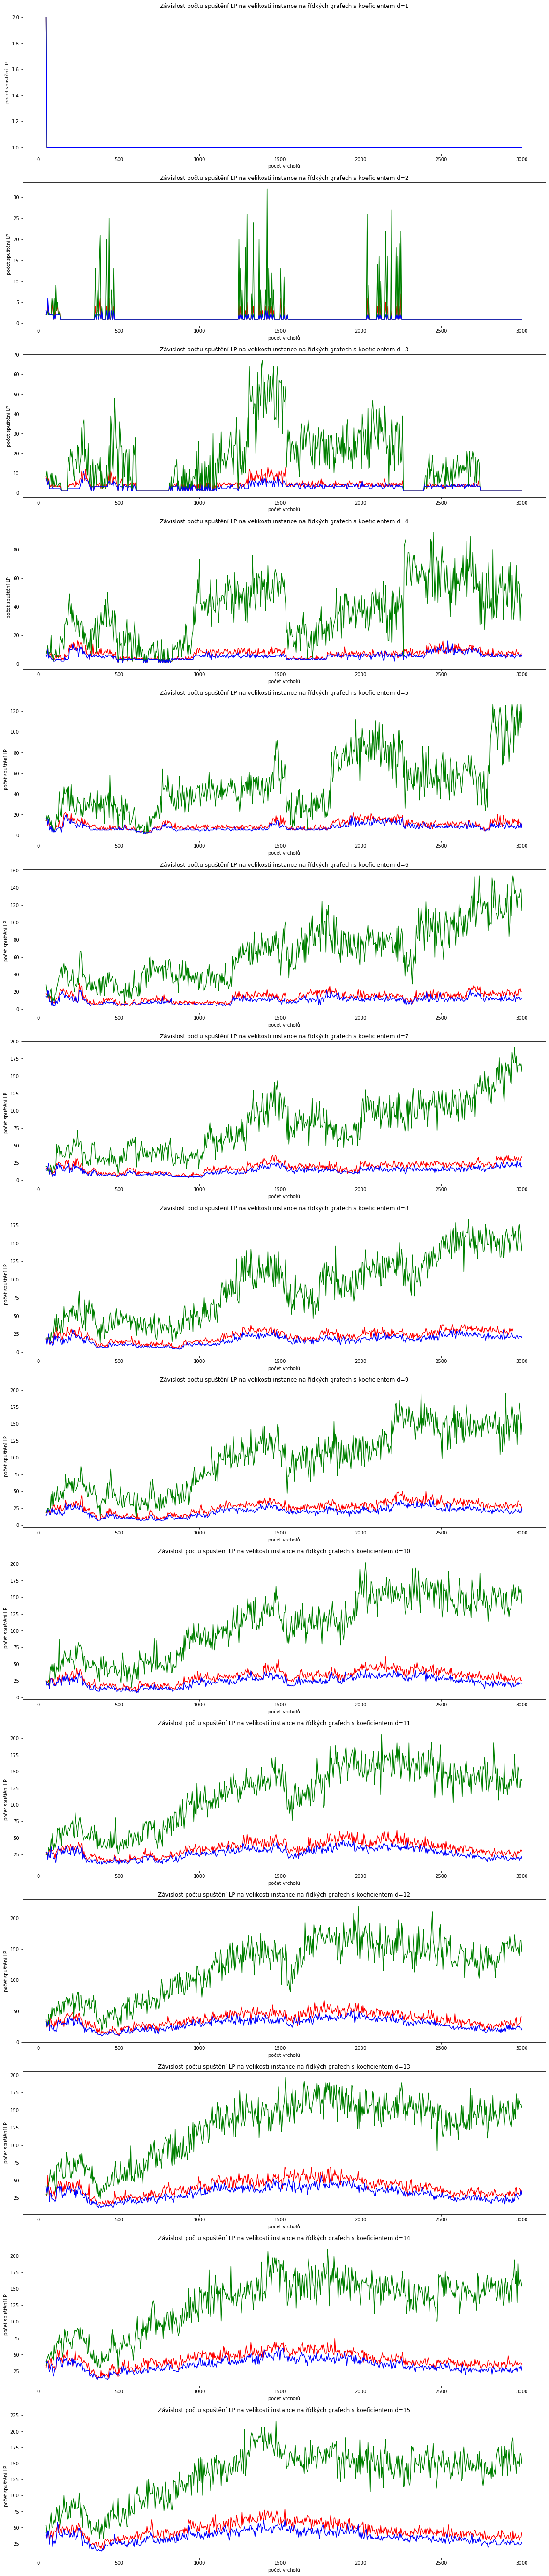

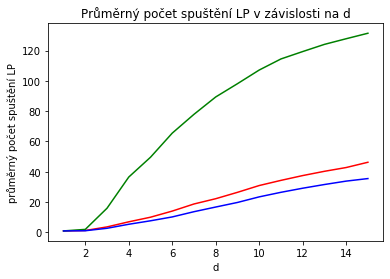

In [3]:

fig,axes = plt.subplots(nrows=len(densities),ncols=1,figsize=(20,100))
for cap,color in zip(capacities,capacities_colors):
    for i,d in enumerate(densities):
        dfEXPLP=pd.read_csv("../out/sparse{d}-exp_lp-{cap}.csv".format(d=d,cap=cap))
        axes[i].set_title("Závislost počtu spuštění LP na velikosti instance na řídkých grafech s koeficientem d={d}".format(d=d))
        axes[i].set_xlabel("počet vrcholů")
        axes[i].set_ylabel("počet spuštění LP")
        axes[i].plot(dfEXPLP['n'],dfEXPLP['lp_runs'],color=color)
plt.show()

for cap,color in zip(capacities,capacities_colors):
    avgsx=[]
    avgsy=[]
    for i,d in enumerate(densities):
        dfEXPLP=pd.read_csv("../out/sparse{d}-exp_lp-{cap}.csv".format(d=d,cap=cap))
        avgsx += [d]
        avgsy += [dfEXPLP['lp_runs'].mean()]
    plt.plot(avgsx,avgsy,color=color)
    plt.title("Průměrný počet spuštění LP v závislosti na d")
    plt.xlabel("d")
    plt.ylabel("průměrný počet spuštění LP")
plt.show()


Nyní se zaměřme na formulaci pomocí exponencielně mnoha podmínek, které byly přidány postupně. Kromě skutečné doby běhu je také zajímavé se podívat na počet spuštění LP (grafy výše).

Z grafů pro dobu běhu je patrné, že tato exponenciální formulace s postupným přidáváním podmínek běžela značně rychleji než přímočará formulace pomocí LP (ať už primárního nebo duálního). Lze si všimnout, že největší potíž algoritmu činily kapacity $c\in\{1,...,100\}$. Poslední graf ukazuje průměrný počet spuštění LP řešiče přes všechny velikosti instancí v závislosti na hustotě vstupního grafu.


## Husté náhodné grafy
Pro $n = 100, 200, ..., 1000$ vygenerován graf na $n$ vrcholech s postupně $n, n+100, n+200, ..., n^2$ hranami nebo dokud to neběželo moc pomalu (déle jak 5 vteřin)

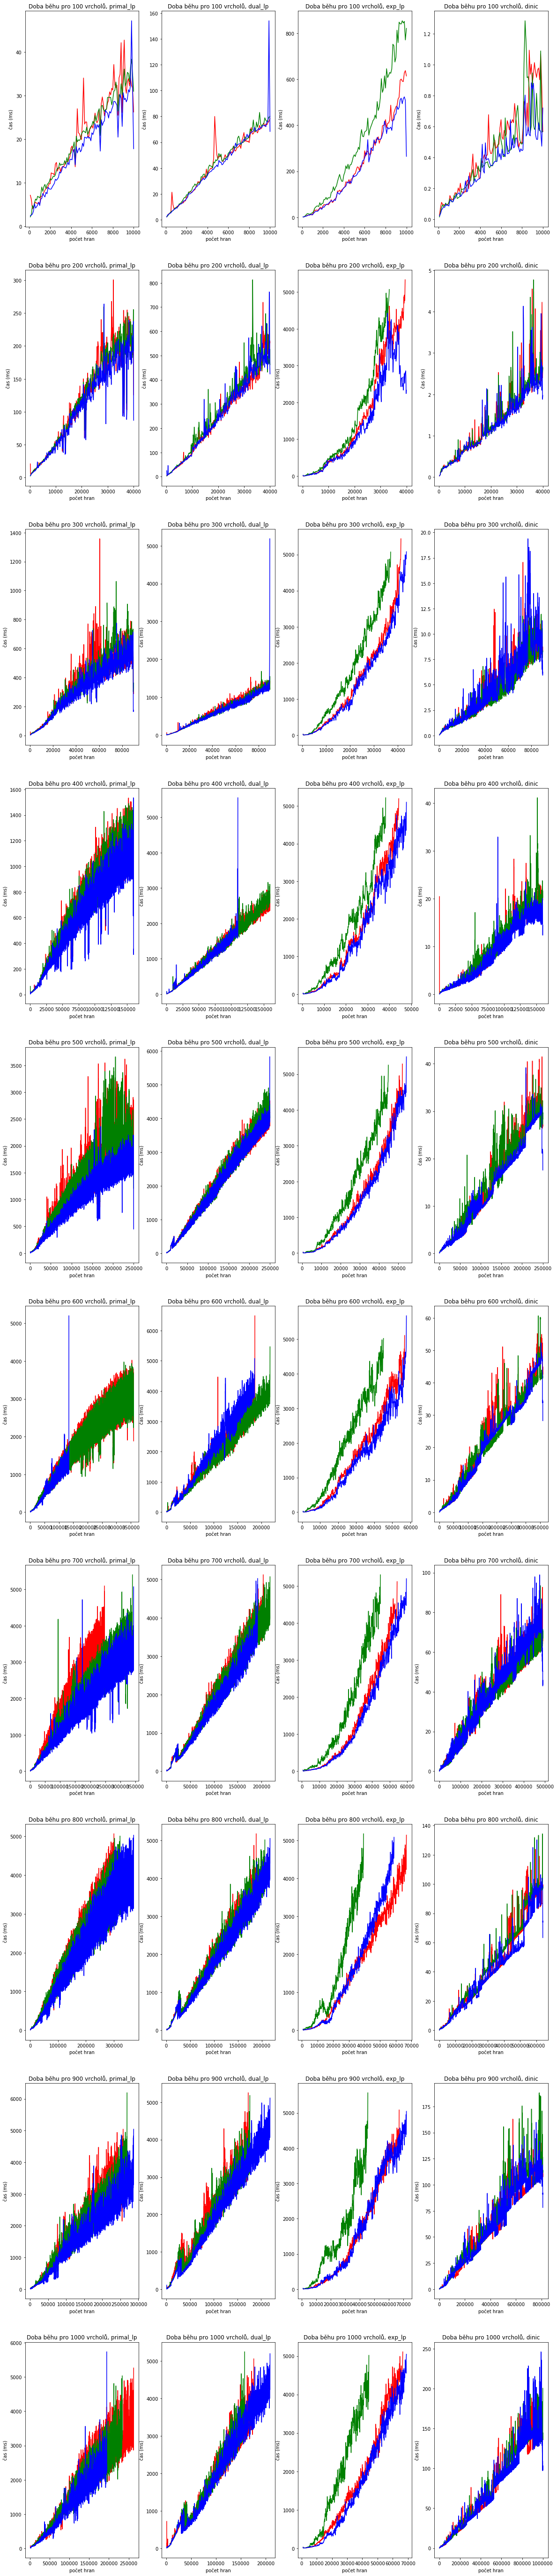

In [4]:
ns = range(100,1001,100)
fig,axes = plt.subplots(nrows=len(ns),ncols=4,figsize=(20,100))

for cap,color in zip(capacities,capacities_colors):
    for i,n in enumerate(ns):
        dfs = [ pd.read_csv("../out/dense{n}-{alg}-{cap}.csv".format(n=n,cap=cap,alg=alg)) for alg in algs ]
        for j,ax in enumerate(axes[i]):
            ax.set_xlabel("počet hran")
            ax.set_ylabel("čas (ms)")
            ax.set_title("Doba běhu pro {n} vrcholů, {alg}".format(n=n,alg=algs[j]))
            ax.plot(dfs[j]['m'], dfs[j][algs[j]]/1000000,color=color)        
plt.show()









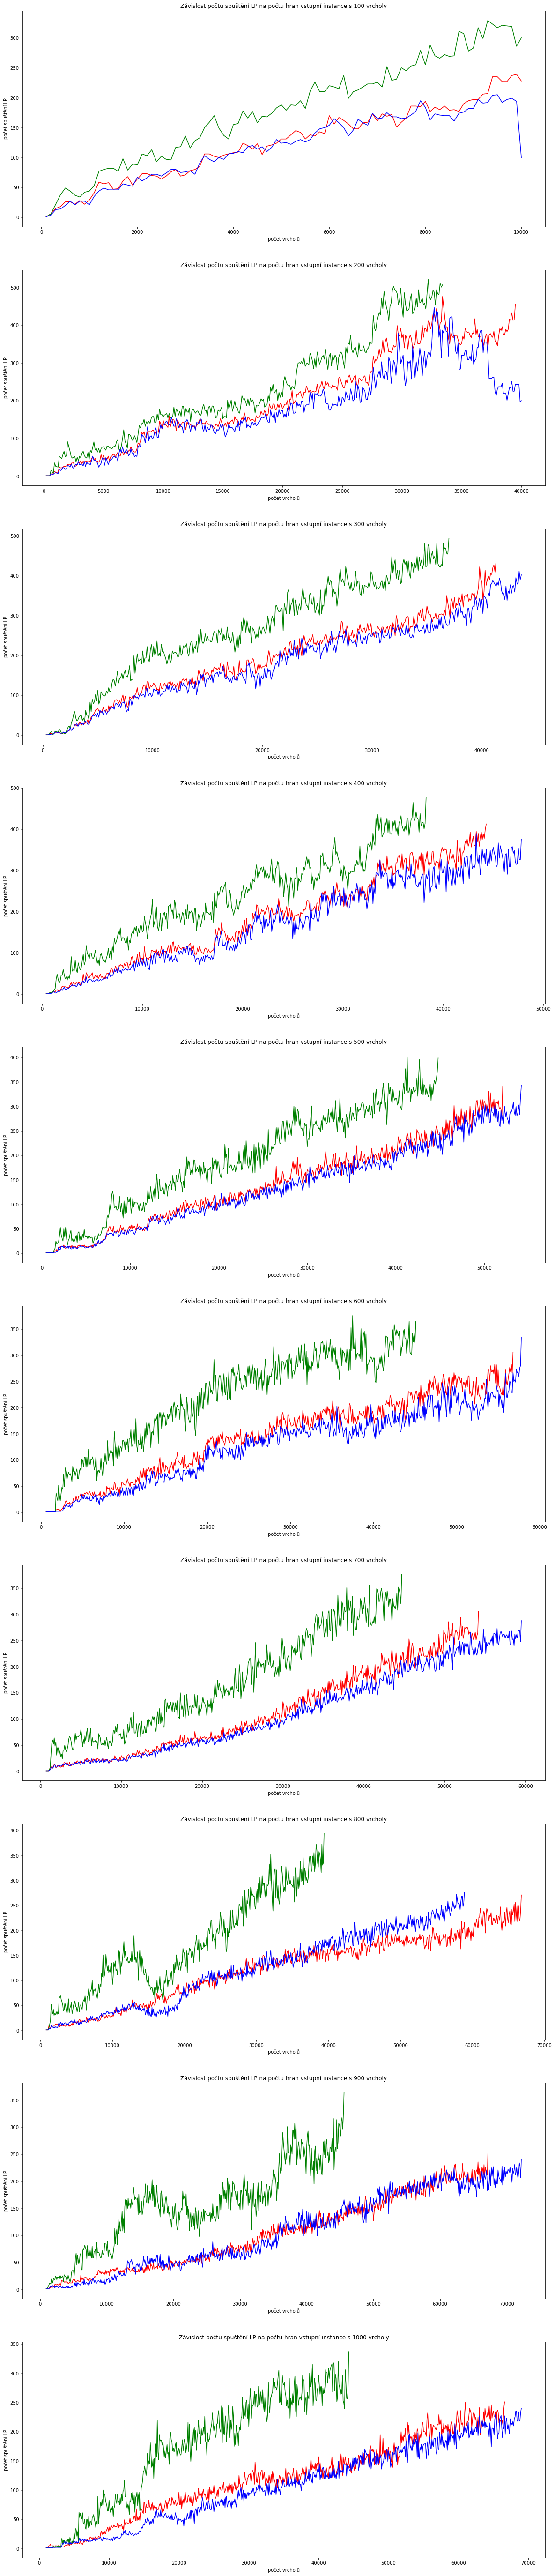

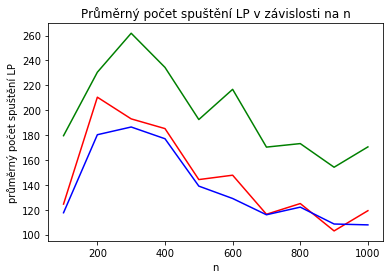

In [5]:

fig,axes = plt.subplots(nrows=len(ns),ncols=1,figsize=(20,100))
for cap,color in zip(capacities,capacities_colors):
    for i,n in enumerate(ns):
        dfEXPLP=pd.read_csv("../out/dense{n}-exp_lp-{cap}.csv".format(n=n,cap=cap))
        axes[i].set_title("Závislost počtu spuštění LP na počtu hran vstupní instance s {n} vrcholy".format(n=n))
        axes[i].set_xlabel("počet vrcholů")
        axes[i].set_ylabel("počet spuštění LP")
        axes[i].plot(dfEXPLP['m'],dfEXPLP['lp_runs'],color=color)
plt.show()

for cap,color in zip(capacities,capacities_colors):
    avgsx=[]
    avgsy=[]
    for i,n in enumerate(ns):
        dfEXPLP=pd.read_csv("../out/dense{n}-exp_lp-{cap}.csv".format(n=n,cap=cap))
        avgsx += [n]
        avgsy += [dfEXPLP['lp_runs'].mean()]
    plt.plot(avgsx,avgsy,color=color)
    plt.title("Průměrný počet spuštění LP v závislosti na n")
    plt.xlabel("n")
    plt.ylabel("průměrný počet spuštění LP")
plt.show()


Opět můžeme vidět, že Dinicův algoritmus je značně rychlejší i na hustých grafech. Srovnejme tedy LP. Primární a duální formulace je více méně srovnatelná, občas je o něco rychlejší primární. Exponenciální formulace ale v této variantě moc nezabírá, často nezvládne ani třikrát menší instance ve srovnatelném čase. Opět jde vidět, že největší potíž exponenciální formulaci činí kapacity $c\in\{1,\ldots,100\}$. Na poslední grafu je opět závislost počtu puštění LP v závislosti na $n$. Je vidět, že oproti řídkým grafům jsou to řádově stovky puštění, což zřejmě bude důsledek toho, že to je tak pomalé.

# Závěr

Zbývá už jen shrnout, co jsme zjistili.
Specializovaný algoritmus na maximální tok v síti vyhrál na plné čáře. To se ale dalo čekat. 
Dále jsme srovnali primární a duální formulaci problému. Na náhodných řídkých grafech občas byla rychlejší jedna formulace než druhá. Na hustých grafech už to bylo více méně srovnatelné.
Exponenciální formulace na řídkých grafech vyšla poměrně dobře a ukázalo se, že nejtěžší jsou malé kapacity $c\in\{1,\ldots,100\}$. Na hustých grafech už exponenciální formulace moc nezabrala a to kvůli řádově vyššímu nutnému počtu spuštění LP (jednotky stovek), zatímco u řídkých grafů to byly desítky.

Problém jsme řešili v plné obecnosti - s grafem se smyčkami. Lze ale instanci značně ořezat, například smyčky odstranit a také všechny hrany vedoucí do zdroje a ze stoku. Není těžké si rozmyslet, že pro každý tok $f$ existuje tok $f'$ stejné velikosti a $f'(e)=0$ pro všechny smyčky a hrany vedoucí do zdroje a ze stoku. Je otázkou, jestli by se tato redukce nějak projevila na efektivitě LP.

Dále se lze zamyslet nad lepší strategií přidávaní cest pro exponenciální formulaci. Vyzkoušena byla varianta přidání jedné cesty v každé iteraci. Stálo by za to vyzkoušet strategii, kde se přidá krátkých (ve smyslu metriky $y_e$) cest hodně. Je ale otázkou, jak těchto více cest najednou (efektivně) hledat. Nabízí se pustit dijkstru a najít v každé iteraci vždy alespoň jednu cestu a pak například náhodně pouštět random-search, případně vytvořit síť rezerv tak jako v Dinitzově algoritmu a hledat krátké (co do počtu hran) cesty a pokud by byly krátké (tj. $<1$), přidat je jako podmínku do řešiče.
